In [1]:
import tensorflow as tf

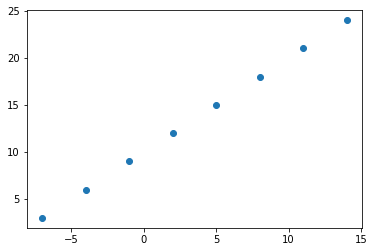

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
# create a demo tensor for our housing price prediction problem

house_info = tf.constant(["badroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-25 23:31:24.770674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-25 23:31:24.770827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'badroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Modeling with Tensor

In [5]:
X =tf.cast(tf.constant(X),dtype=tf.float32) 
y = tf.cast(tf.constant(y),dtype=tf.float32) 
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## step with modeling Tensorflow
1. creating a model - define the input and output layer as well as the hidden layers of deep learning model.
2. compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (Tells our model how to improve the patterns its learning) and evaluation metrics (what we can ise to interpret the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y

In [6]:
# set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# "sgd" sgd is short for stochasic gradient descent
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=["mae"]
)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


2022-06-25 23:04:41.105532: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-25 23:04:41.246879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 197ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [7]:
# prediction
y_red = model.predict([17.0])
y_red

1/1 [==============================] - 0s 37ms/step


2022-06-25 23:04:42.052046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[30.158512]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [8]:
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
large_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.009),metrics=["mae"])
large_model.fit(tf.expand_dims(X,axis=-1),y,epochs=1500)


Epoch 1/1500
1/1 [==============================] - 0s 302ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/1500
1/1 [==============================] - 0s 5ms/step - loss: 13.0822 - mae: 13.0822
Epoch 3/1500
1/1 [==============================] - 0s 5ms/step - loss: 12.2091 - mae: 12.2091
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 11.3676 - mae: 11.3676
Epoch 5/1500
1/1 [==============================] - 0s 6ms/step - loss: 10.6505 - mae: 10.6505
Epoch 6/1500
1/1 [==============================] - 0s 5ms/step - loss: 9.9227 - mae: 9.9227
Epoch 7/1500
1/1 [==============================] - 0s 5ms/step - loss: 9.1819 - mae: 9.1819
Epoch 8/1500
1/1 [==============================] - 0s 6ms/step - loss: 8.4296 - mae: 8.4296
Epoch 9/1500
1/1 [==============================] - 0s 5ms/step - loss: 7.6628 - mae: 7.6628
Epoch 10/1500
1/1 [==============================] - 0s 6ms/step - loss: 6.8778 - mae: 6.8778
Epoch 11/1500
1/1 [==============================] - 0s 5

2022-06-25 23:04:42.326693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 4.2066 - mae: 4.2066
Epoch 18/1500
1/1 [==============================] - 0s 5ms/step - loss: 4.4831 - mae: 4.4831
Epoch 19/1500
1/1 [==============================] - 0s 6ms/step - loss: 4.6562 - mae: 4.6562
Epoch 20/1500
1/1 [==============================] - 0s 5ms/step - loss: 4.7372 - mae: 4.7372
Epoch 21/1500
1/1 [==============================] - 0s 5ms/step - loss: 4.7361 - mae: 4.7361
Epoch 22/1500
1/1 [==============================] - 0s 6ms/step - loss: 4.6668 - mae: 4.6668
Epoch 23/1500
1/1 [==============================] - 0s 5ms/step - loss: 4.5389 - mae: 4.5389
Epoch 24/1500
1/1 [==============================] - 0s 6ms/step - loss: 4.3608 - mae: 4.3608
Epoch 25/1500
1/1 [==============================] - 0s 5ms/step - loss: 4.1453 - mae: 4.1453
Epoch 26/1500
1/1 [==============================] - 0s 5ms/step - loss: 3.8956 - mae: 3.8956
Epoch 27/1500
1/1 [==============================] - 0s 5ms/step - loss: 3

In [9]:
pred = large_model.predict([17.0])
pred

1/1 [==============================] - 0s 37ms/step


2022-06-25 23:04:54.972501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[27.100298]], dtype=float32)

# Evaluation of a model

In [2]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-25 23:46:58.544556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-25 23:46:58.544691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

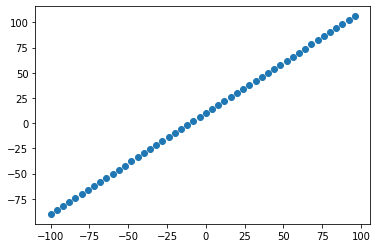

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### the 3 sets ...

In [48]:
# traning set 70 -80 percent            learn pattern
# validation set 10-25 percent          practice exam like past paper
# Test set 10 -15 percent               Final Exam DSE
# Generalization

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]


len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

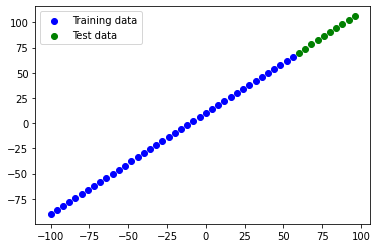

In [49]:
plt.figure()
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")

plt.legend()

In [51]:
# create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss='mae',optimizer='sgd',metrics=["mae"])

# model.fit(tf.expand_dims(input=X_train,axis=-1),y_train,epochs=100)

In [55]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1]) # fully connected
])

model.compile(loss='mae',optimizer='sgd',metrics=["mae"])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


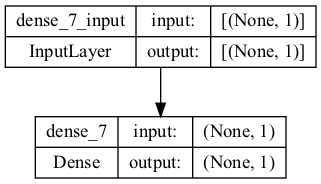

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [58]:
model.fit(tf.expand_dims(input=X_train,axis=-1),y_train,epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 0s 14ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/1500
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/1500
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/1500
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/1500
2/2 [==============================] - 0s 10ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/1500
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/1500
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/1500
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/1500
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/1500
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/1500
2/2 [==============================] - 0s

2022-06-26 00:00:49.892885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step - loss: 10.6639 - mae: 10.6639
Epoch 13/1500
2/2 [==============================] - 0s 5ms/step - loss: 9.7977 - mae: 9.7977
Epoch 14/1500
2/2 [==============================] - 0s 5ms/step - loss: 16.0103 - mae: 16.0103
Epoch 15/1500
2/2 [==============================] - 0s 5ms/step - loss: 11.4068 - mae: 11.4068
Epoch 16/1500
2/2 [==============================] - 0s 5ms/step - loss: 8.5393 - mae: 8.5393
Epoch 17/1500
2/2 [==============================] - 0s 5ms/step - loss: 13.6348 - mae: 13.6348
Epoch 18/1500
2/2 [==============================] - 0s 4ms/step - loss: 11.4629 - mae: 11.4629
Epoch 19/1500
2/2 [==============================] - 0s 5ms/step - loss: 17.9148 - mae: 17.9148
Epoch 20/1500
2/2 [==============================] - 0s 6ms/step - loss: 15.0494 - mae: 15.0494
Epoch 21/1500
2/2 [==============================] - 0s 5ms/step - loss: 11.0216 - mae: 11.0216
Epoch 22/1500
2/2 [==============================] - 0s 5m

In [37]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 29ms/step


2022-06-25 23:53:30.973507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[44.726128],
       [47.445686],
       [50.165245],
       [52.8848  ],
       [55.604355],
       [58.323917],
       [61.043465],
       [63.763023],
       [66.48258 ],
       [69.20213 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

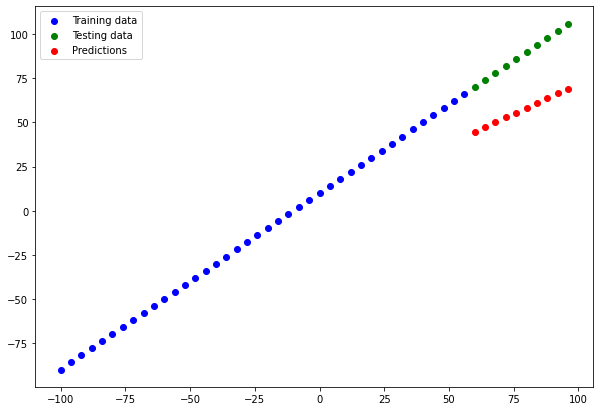

In [44]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [61]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 16.4586 - mae: 16.4586


[16.458602905273438, 16.458602905273438]

In [62]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=976.75116>